# Play with geospatial data in xarray

In [1]:
!pip install -q planetary_computer

In [2]:
import pystac_client
import planetary_computer
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import pandas as pd
import odc.stac
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rasterio as rio
import geopandas as gpd
import stackstac
import odc.stac

## Read in a geometry of an area of interest from a geojson file

In [3]:
aoi_gdf = gpd.read_file('map.geojson')

<Axes: >

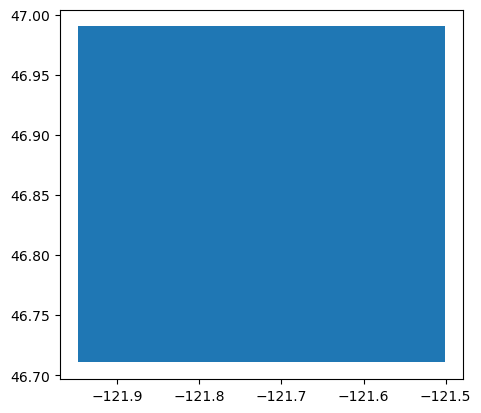

In [4]:
aoi_gdf.plot()

## Grab Copernicus 30M DEM from Microsoft Planetary Computer

In [5]:
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
search = catalog.search(collections=["cop-dem-glo-30"],bbox=aoi_gdf.total_bounds)
items = search.item_collection()
print(f"Returned {len(items)} Items")

Returned 1 Items


## Use stackstac (or try odc.stac) to bring in the data as an xarray

In [6]:
dem_raster = stackstac.stack(items).squeeze()

/srv/conda/envs/notebook/lib/python3.11/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [7]:
dem_raster

<xarray.DataArray 'stackstac-8667b5f757f1b55426869cae0374a96f' (y: 3601, x: 3601)>
dask.array<getitem, shape=(3601, 3601), dtype=float64, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    time            datetime64[ns] 2021-04-22
    id              <U40 'Copernicus_DSM_COG_10_N46_00_W122_00_DEM'
    band            <U4 'data'
  * x               (x) float64 -122.0 -122.0 -122.0 ... -121.0 -121.0 -121.0
  * y               (y) float64 47.0 47.0 47.0 47.0 47.0 ... 46.0 46.0 46.0 46.0
    gsd             int64 30
    proj:transform  object {0.0, -0.0002777777777777778, -122.00013888888888,...
    proj:shape      object {3600}
    proj:epsg       int64 4326
    platform        <U8 'TanDEM-X'
    title           <U14 'N46_00_W122_00'
    epsg            int64 4326
Attributes:
    spec:        RasterSpec(epsg=4326, bounds=(-122.00027777777778, 46.0, -12...
    crs:         epsg:4326
    transform:   | 0.00, 0.00,-122.00|\n| 0.00,-0.00, 47.00|\n| 0.00, 0.00, 1...
    resolution:  0.0002777777777777778

## Plot an xarray dataarray

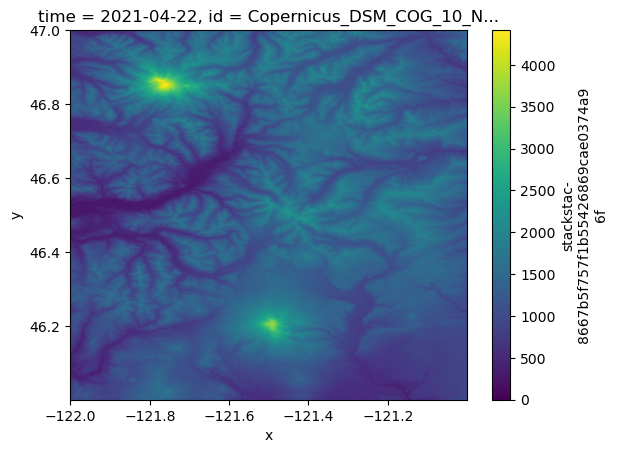

In [8]:
dem_raster.plot()

# let's clip

In [9]:
dem_raster_clipped = dem_raster.rio.clip(aoi_gdf.geometry)

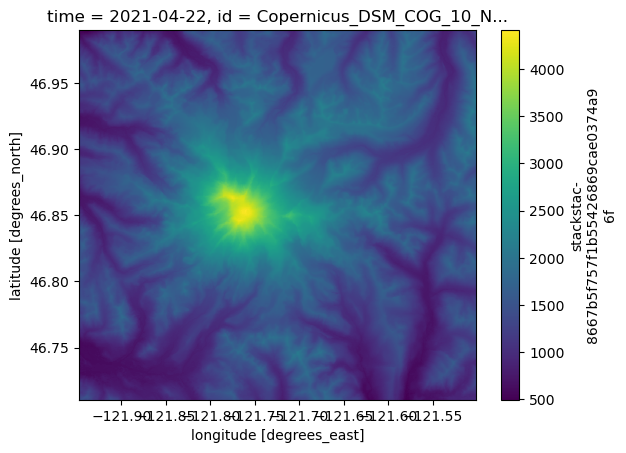

In [10]:
dem_raster_clipped.plot()

## let's project to UTM zone 10N

In [11]:
dem_raster_clipped_projected = dem_raster_clipped.rio.reproject("EPSG:32610",nodata=np.nan)

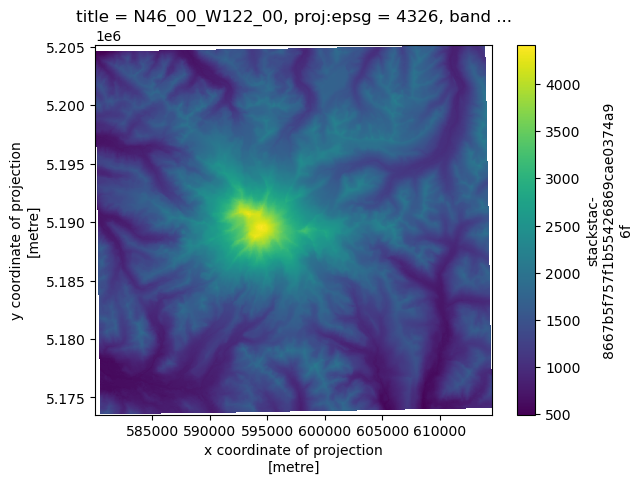

In [12]:
dem_raster_clipped_projected.plot()

## I want to reproject to the exact grid of another raster (match projection, grid, and resolution)